In [119]:
import math
import numpy as np

def solve_quadratic(a, b, c):
    discriminant = b**2 - 4*a*c
    
    if discriminant > 0:
        x_1 = (-b + math.sqrt(discriminant)) / (2*a)
        x_2 = (-b - math.sqrt(discriminant)) / (2*a)
        return (x_1, x_2)
    elif discriminant == 0:
        x_1 = -b / (2*a)
        return (x_1,)
    else:
        real_part = -b / (2*a)
        imaginary_part = math.sqrt(-discriminant) / (2*a)
        x_1 = complex(real_part, imaginary_part)
        x_2 = complex(real_part, -imaginary_part)
        return (x_1, x_2)
    
def optimize_mu(y: np.array):
    a = len(y)
    b = - 2 * np.sum(y)
    c = np.sum(y**2)
    return solve_quadratic(a, b, c)

Optimal mu: 20.077349489032926
Original mu: 20


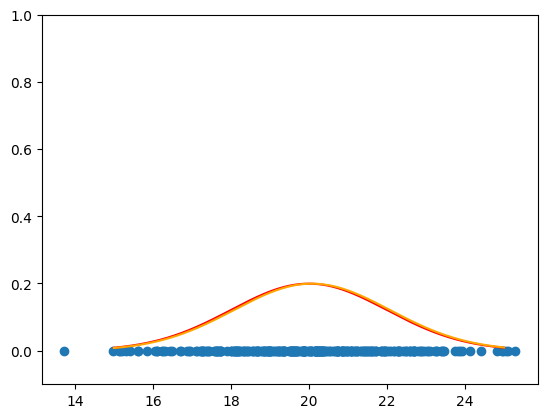

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(8)
sigma = 2
mu = 20
y = np.random.normal(mu, sigma, 300)

x = np.linspace(15, 25, 1000)
opt_mu = np.abs(optimize_mu(y))[0]
pdf = norm.pdf(x, mu, sigma)
opt_pdf = norm.pdf(x, opt_mu, sigma)

print(f'Optimal mu: {opt_mu}')
print(f'Original mu: {mu}')

plt.plot(x, pdf, color='red')
plt.plot(x, opt_pdf, color='orange')
plt.scatter(y, np.zeros_like(y))
plt.ylim(-0.1, 1)

plt.show()



In [127]:
def kl_divergence(q: np.array, p: np.array) -> float:
    if len(q) != len(p):
        raise ValueError("The two distributions must have the same length")
    elif not np.isclose(np.sum(q), 1, atol=1e-8) or not np.isclose(np.sum(p), 1, atol=1e-8):
        raise ValueError("The two distributions must sum up to 1")
    return np.sum(q * np.log(q / p))

q = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.5])
p = np.array([0.4, 0.1, 0.1, 0.2, 0.1, 0.1])

print(kl_divergence(p, q))

# the KL divergence is used between two distributions which sum up to 1, and not simple functions
# also the KL value is >= 0


0.5322033893165352
